# Indexación 

Hay muchas maneras de indexar un archivo en Solr. Podemos hacer un acercamiento con Schema o Schemaless. En el caso de Schema debemos escribir un archivo 'managed-schema.xml' el cual contiene los campos de busca de un documento. 

Primer ejemplo. 
Indexar un archivo csv de forma schemaless. En este approach comenzamos por crear el core donde estarán nuestros documentos. Al agregar el archivo csv al core, el documento 'managed-schema.xml' agregará automáticamente los campos de búsqueda de los documentos. 

Tenemos el siguiente csv que queremos cargar a Solr:

In [2]:
import pandas as pd
pd.read_csv("estancia_sample.csv")

,CU,Nombre,Apellido,Estancia,Musica
0,203058,Nelson,Gil,Conabio,Rock
1,184689,Rodrigo,Juarez,Conabio,Pop
2,154975,Vianney,Sanchez,Conabio,Metal


Para crear un nuevo core sin esquema nos dirigimos al folder donde instalamos solr y lo iniciamos: 

```console
$ bin/solr start
```

Una vez que nuestro solr ha iniciado en nuestro local host corremos lo siguiente para crear el core: 

```console
$ bin/solr create -c <core_name>
```

Una vez que se creó el core será visible desde la interfaz. Debemos ir a documents y cambiar el request handler de "/update" a "/update/csv" y cargar nuestro archivo csv.

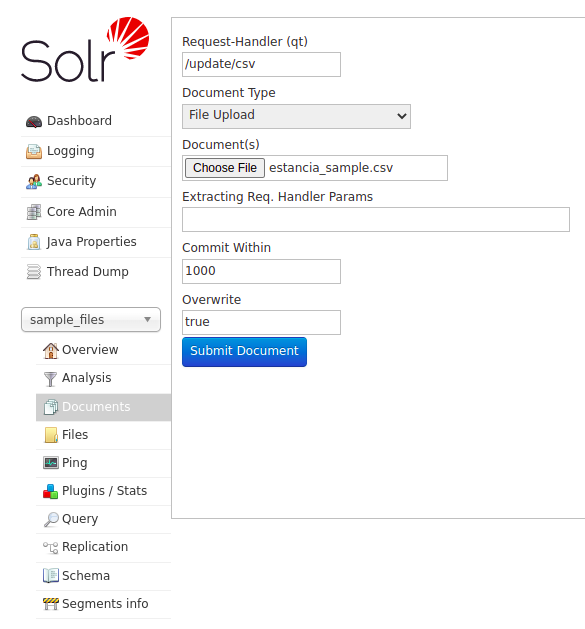

Después de que se carga, el schema se modifica y agrega los campos que son las nombres de las columnas del csv. Si hacemos un query de todos nuestros documentos obtenemos lo siguiente: 

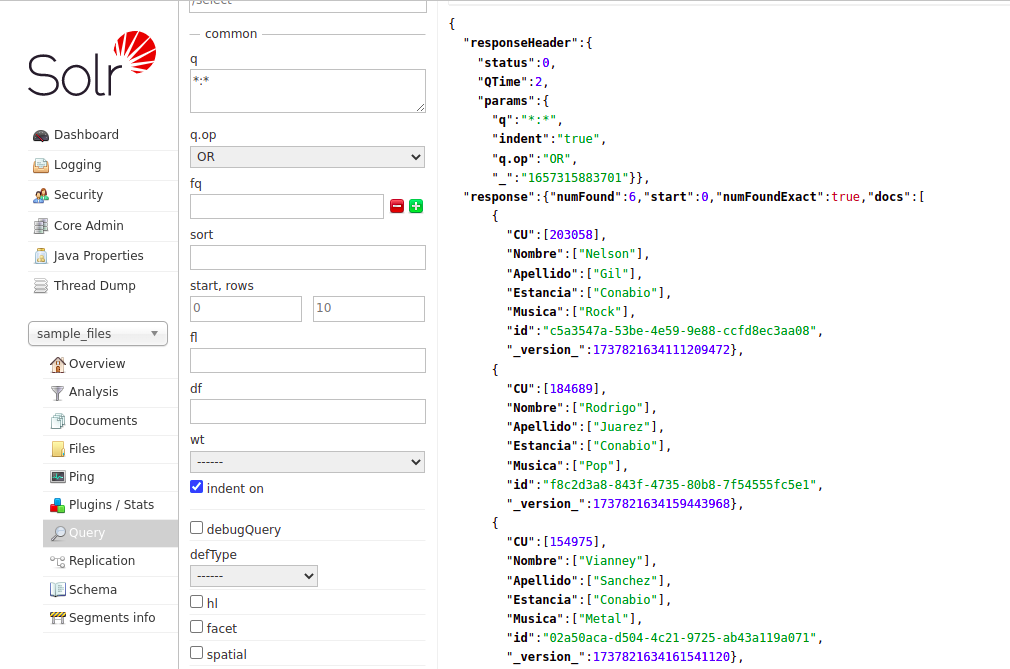


Tenemos los 3 individuos Rodrigo, Vianney y Nelson. Cada columna del csv ahora es un campo de búsqueda para los documentos. Probemos con un query específico. Digamos que queremos encontrar a los estudiantes que se apelliden Juarez o que les guste la música Metal. Entonces nuestro query sería: 

```console
Apellido: *Juarez* OR Musica: *Metal*
```

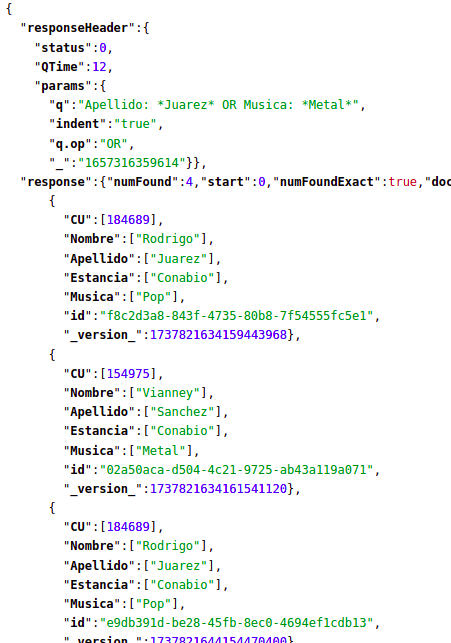

Y obtenemos dos resultados. 

### Audios, imágenes o videos

No es tan sencillo hacer una carga directa de videos directo a Solr, por lo que podemos usar Apache Tika. 